## Part 0: Import packages

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


## Part 1: Read the nCounter csv file

In [4]:
#################
# 記得改日其跟檔名
#################

dir_data = '../data/191015/'
filename='HEPG2_樹豆萃取液肝臟抗氧化基因檢測.csv'
f_app = os.path.join(dir_data, filename)
print('Path of read in data: %s' % (f_app))
IBD_table = pd.read_csv(f_app)
IBD_table.head()

Path of read in data: ../data/191015/HEPG2_樹豆萃取液肝臟抗氧化基因檢測.csv


,Probe Name,Accession #,NS Probe ID,Class Name,Analyte Type,% Samples above Threshold,Annotation,HEPG2 mock1,HEPG2 mock2,HEPG2 mock3,...,H2O2 3,2605L 6h1,2605L 6h2,2605L 6h3,2277L 6h1,2277L 6h2,2277L 6h3,2277H 6h1,2277H 6h2,2277H 6h3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AANAT,NM_001088.2,AANAT,Endogenous,mRNA,0.00,NaN,20.00,20.00,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
3,ABCA1,NM_005502.3,ABCA1,Endogenous,mRNA,88.46,NaN,186.92,216.06,175.66,...,145.46,139.51,153.40,158.39,184.71,127.16,129.77,171.76,154.90,141.37
4,ABR,NM_001092.4,ABR,Endogenous,mRNA,100.00,NaN,108.81,108.03,109.92,...,78.79,113.58,117.06,130.20,106.77,93.57,93.97,103.75,114.62,109.95


## Part 2: Data preprocessing

In [5]:
for i in IBD_table.columns[1:7]:
    print(i)
    IBD_table=IBD_table.drop([i], axis=1)

IBD_table.head()

Accession #
NS Probe ID
Class Name
Analyte Type
% Samples above Threshold
Annotation


,Probe Name,HEPG2 mock1,HEPG2 mock2,HEPG2 mock3,H2O2 1,H2O2 2,H2O2 3,2605L 6h1,2605L 6h2,2605L 6h3,2277L 6h1,2277L 6h2,2277L 6h3,2277H 6h1,2277H 6h2,2277H 6h3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AANAT,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
3,ABCA1,186.92,216.06,175.66,181.72,166.62,145.46,139.51,153.40,158.39,184.71,127.16,129.77,171.76,154.90,141.37
4,ABR,108.81,108.03,109.92,93.46,144.89,78.79,113.58,117.06,130.20,106.77,93.57,93.97,103.75,114.62,109.95


In [6]:
# get the samples colunm names

cl_list=[]
for i in IBD_table.columns[1:]:

    if i[:-1] in cl_list:
        continue
    else:
        cl_list.append(i[:-1])
        
print(cl_list)

['HEPG2 mock', 'H2O2 ', '2605L 6h', '2277L 6h', '2277H 6h']


In [7]:
table_col=['Probe Name']
table_col.extend(cl_list)
len(table_col)
len(IBD_table['Probe Name'][2:])

171

## Part 3: Mean of Mock

In [8]:
# the mean of MOCK
for j in cl_list[0:]:
    mean_col=[]
    std_col=[]
    for i in range(2, len(IBD_table['Probe Name'])):
        var_list=[]
        var_list.append(float(IBD_table[j+'1'][i]))
        var_list.append(float(IBD_table[j+'2'][i]))
        var_list.append(float(IBD_table[j+'3'][i]))
        
        df_group_test=pd.DataFrame(var_list)
        mean_col.append(float(df_group_test.mean().get_values()))
        
    if j == cl_list[0]:
        df_index_col=pd.DataFrame(list(IBD_table['Probe Name'][2:]))
        df_m_0=pd.DataFrame(mean_col)
        df1_m_test0=pd.concat([df_index_col, df_m_0], axis=1)       
        
    else:
        n=1
        while n <= 3:
            df_m_0=pd.DataFrame(list(IBD_table[j+str(n)][2:]))
            df1_m_test0=pd.concat([df1_m_test0, df_m_0], axis=1)
            n+=1
        
table_index=[]
for i in IBD_table['Probe Name'][2:]:
    table_index.append(i)
df_index=pd.DataFrame({'index':table_index})
df1_m_test0=df1_m_test0.rename(index=df_index['index'])
table_col=['Probe Name', 'MOCK']
table_col.extend(IBD_table.columns[4:])
df1_m_test0.columns=table_col
df1_m_test0=df1_m_test0.drop(columns=['Probe Name'])

df1_m_test0.head()

,MOCK,H2O2 1,H2O2 2,H2O2 3,2605L 6h1,2605L 6h2,2605L 6h3,2277L 6h1,2277L 6h2,2277L 6h3,2277H 6h1,2277H 6h2,2277H 6h3
AANAT,20.000000,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
ABCA1,192.880000,181.72,166.62,145.46,139.51,153.40,158.39,184.71,127.16,129.77,171.76,154.90,141.37
ABR,108.920000,93.46,144.89,78.79,113.58,117.06,130.20,106.77,93.57,93.97,103.75,114.62,109.95
ACC (ACACA),64.766667,51.92,20.00,20.00,43.21,51.31,44.30,51.25,47.98,49.22,42.00,43.06,42.39
AIFM1,306.943333,293.35,318.75,263.64,280.25,279.01,315.44,303.22,280.71,251.71,221.01,262.34,243.46


## Part 4: Normalization: samples / mock

In [9]:
# Normalization: samples / mock

for i in range(0,len(df1_m_test0.columns)):
    temp=[]
    for j in range(len(table_index)):

        a=df1_m_test0.at[table_index[j],df1_m_test0.columns[i]]
        b=df1_m_test0.at[table_index[j],df1_m_test0.columns[0]]
        val=float(a)/float(b)
        temp.append(val)
        
    if i == 0:
        df_temp=pd.DataFrame(temp)
        ndf1_test=df_temp
    if i > 0:
        df_temp=pd.DataFrame(temp)
        ndf1_test=pd.concat([ndf1_test, df_temp], axis=1)
        
ndf1_test.columns=table_col[1:]
df_index=pd.DataFrame({'index':table_index})
ndf1_test=ndf1_test.rename(index=df_index['index'])
ndf1_test.head()

,MOCK,H2O2 1,H2O2 2,H2O2 3,2605L 6h1,2605L 6h2,2605L 6h3,2277L 6h1,2277L 6h2,2277L 6h3,2277H 6h1,2277H 6h2,2277H 6h3
AANAT,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ABCA1,1.0,0.942140,0.863853,0.754148,0.723299,0.795313,0.821184,0.957642,0.659270,0.672802,0.890502,0.803090,0.732943
ABR,1.0,0.858061,1.330242,0.723375,1.042784,1.074734,1.195373,0.980261,0.859071,0.862743,0.952534,1.052332,1.009456
ACC (ACACA),1.0,0.801647,0.308801,0.308801,0.667164,0.792229,0.683994,0.791302,0.740813,0.759959,0.648482,0.664848,0.654503
AIFM1,1.0,0.955714,1.038465,0.858921,0.913035,0.908995,1.027682,0.987870,0.914534,0.820054,0.720035,0.854685,0.793176


## Part 5: Mean of samples ( with 3 replicates )

In [10]:
######
# Mean
######


for j in cl_list:
    
    mean_col=[]
    std_col=[]
    
    mock_list=[1,1,1]
    p_list=[]
    
    for i in table_index:
        
        if j == cl_list[0]:
            var_list=[1,1,1]
            df_group_test=pd.DataFrame(var_list)
            mean_col.append(float(df_group_test.mean().get_values()))
            std_col.append(float(df_group_test.std().get_values()))
        
        else:
            var_list=[]
            var_list.append(float(ndf1_test[j+'1'][i]))
            var_list.append(float(ndf1_test[j+'2'][i]))
            var_list.append(float(ndf1_test[j+'3'][i]))
        
            df_group_test=pd.DataFrame(var_list)
            mean_col.append(float(df_group_test.mean().get_values()))
            std_col.append(float(df_group_test.std().get_values()))   

            p_value=ttest_ind(mock_list, var_list)[1]
            p_list.append(p_value)
            
    if j == cl_list[0]:
        df_m_0=pd.DataFrame(mean_col)
        df1_mean=df_m_0

        df_s_0=pd.DataFrame(std_col)
        df1_std=df_s_0       
        
    else:
        df_m_0=pd.DataFrame(mean_col)
        df1_mean=pd.concat([df1_mean, df_m_0], axis=1)

        df_s_0=pd.DataFrame(std_col)
        df1_std=pd.concat([df1_std, df_s_0], axis=1)
        
        if j == cl_list[1]:
            df1_p=pd.DataFrame(p_list)
        else:
            df_p_0=pd.DataFrame(p_list)
            df1_p=pd.concat([df1_p, df_p_0], axis=1)

df_index=pd.DataFrame({'index':table_index})
df1_mean=df1_mean.rename(index=df_index['index'])
table_col=[]
table_col.extend(cl_list)
df1_mean.columns=cl_list

# output the file with mean
#df1_mean.to_csv('nCounter_mean_table.csv')
df1_mean.head()


,HEPG2 mock,H2O2,2605L 6h,2277L 6h,2277H 6h
AANAT,1.0,1.000000,1.000000,1.000000,1.000000
ABCA1,1.0,0.853380,0.779932,0.763238,0.808845
ABR,1.0,0.970559,1.104297,0.900692,1.004774
ACC (ACACA),1.0,0.473083,0.714462,0.764025,0.655944
AIFM1,1.0,0.951033,0.949904,0.907486,0.789299


In [46]:
#for j in cl_list[0:]:
#    mean_col=[]
#    std_col=[]
#    for i in range(2, len(IBD_table['Probe Name'])):
#        var_list=[]
#        var_list.append(float(IBD_table[j+'1'][i]))
#        var_list.append(float(IBD_table[j+'2'][i]))
#        var_list.append(float(IBD_table[j+'3'][i]))
#        
#        df_group_test=pd.DataFrame(var_list)
#        mean_col.append(float(df_group_test.mean().get_values()))
#        std_col.append(float(df_group_test.std().get_values()))
#        #print(j, var_list, float(df_group_test.mean().get_values()))
#        
#    if j == cl_list[0]:
#        df_index_col=pd.DataFrame(list(IBD_table['Probe Name'][2:]))
#        df_m_0=pd.DataFrame(mean_col)
#        df1_m_test0=pd.concat([df_index_col, df_m_0], axis=1)

#        df_s_0=pd.DataFrame(std_col)
#        df1_s_test0=pd.concat([df_index_col, df_s_0], axis=1)        
        
#    else:
#        df_m_0=pd.DataFrame(mean_col)
#        df1_m_test0=pd.concat([df1_m_test0, df_m_0], axis=1)

#        df_s_0=pd.DataFrame(std_col)
#        df1_s_test0=pd.concat([df1_s_test0, df_s_0], axis=1)
        
        #print(IBD_table['Probe Name'][i], IBD_table[j+'1'][i],IBD_table[j+'2'][i],IBD_table[j+'3'][i])
        #print(IBD_table['Probe Name'][i], IBD_table[j][i])

        
#table_index=[]
#for i in IBD_table['Probe Name'][2:]:
#    table_index.append(i)
#df_index=pd.DataFrame({'index':table_index})
#df1_m_test0=df1_m_test0.rename(index=df_index['index'])
#table_col=['Probe Name']
#table_col.extend(cl_list)
#df1_m_test0.columns=table_col
#df1_m_test0=df1_m_test0.drop(columns=['Probe Name'])

#df1_m_test0

## Part 6: Standard deviation of samples

In [11]:
#####################
# standard deviation
#####################

df_index=pd.DataFrame({'index':table_index})
df1_std=df1_std.rename(index=df_index['index'])
df1_std.columns=cl_list

# output the std file
#df1_std.to_csv('nCounter_std_table.csv')
df1_std.head()

,HEPG2 mock,H2O2,2605L 6h,2277L 6h,2277H 6h
AANAT,0.0,0.000000,0.000000,0.000000,0.000000
ABCA1,0.0,0.094433,0.050723,0.168495,0.078937
ABR,0.0,0.318691,0.080476,0.068933,0.050064
ACC (ACACA),0.0,0.284545,0.067871,0.025489,0.008278
AIFM1,0.0,0.089864,0.067388,0.084130,0.067409


## Part 7: p-value of samples

In [12]:
df_index=pd.DataFrame({'index':table_index})
df1_p=df1_p.rename(index=df_index['index'])
df1_p.columns=cl_list[1:]

# out the p-value file
#df1_p.to_csv('nCounter_p_table.csv')
df1_p.head()

,H2O2,2605L 6h,2277L 6h,2277H 6h
AANAT,NaN,NaN,NaN,NaN
ABCA1,0.054701,0.001678,0.071686,1.375812e-02
ABR,0.880631,0.088157,0.067105,8.768205e-01
ACC (ACACA),0.032670,0.001885,0.000088,2.231022e-07
AIFM1,0.398715,0.267330,0.129539,5.639779e-03


## Part 8: Heatmap of samples

In [14]:
plt.figure(figsize=(10,50))
file_heatmap = dir_data + "Heatmap_" + filename[:-4] + ".png"
plt.savefig(file_heatmap)
plt.show()
#annot = True,

<Figure size 720x3600 with 0 Axes>

## Part 9: Define the genetic groups

In [15]:
G1=['SOD1','SOD2','GPX1','CAT']
G2=['CCT2','CCT5','CCT6A','CCT7','CCT8','Pink1', 'Atg1','Atg8','SIRT1','FOXO','PARP1','PARP2','NADSYN','MRPS5','Ubl-5','SOD3'] #,'Parkin'
G3=['UNG','OGG1','MPG','APEX1','ERCC1','ERCC6','XPA','XRCC1','XRCC5','MSH2','MLH1','MSH6']
G4=['IL-1B','IL-8','IL-6','IL-10','IL-18','TNF-a']
G5=['IL-1B','IL-6','IL-8','SOD1','SOD2','GPX1']
G6=['VEGFA','CASP3','CASP8','IL-1B','IL-8','TNF-a']
G7=['TYR','TYRP1','MC1R','MITF']
G8=['COL1A1','COL1A2','COL4A1','COL4A4','COL4A5','MMP1','MMP9','MMP2','TIMP1','ELN','FBN1','LOX','HAS2','HAS3']
G9=['IL-1B','IL-8','IL-6','IL-10','IL-18','TNF-a','IL-16','IL23','IL12A','IFNG','TGFB','IL3','IL4']
G10=['BCL-2','BAX','BCLXL','BAD','CASP9','AIFM1','EndoG']
G11=['PTGIS','NOS3','EDN1','PLAT','PROC','VWF','F3','SERPINE1','PDGFC','FGF2','IGF2BP3','IGF1R','IL-8','IL-6','ICAM1','VCAM1','CASP8']
G12=['SIRT1','CLOCK','BMAL1 (ARNTL)','PER2','CRY','KPNB1']
G13=['ICAM1','VCAM1','IL-8','NOS3']
G14=['UNG','OGG1','MPG','APEX1','ERCC1','ERCC6','XPA','XRCC1','XRCC5','MSH2','MLH1','MSH6','SOD1','SOD2','GPX1','CAT']
G15=['Tgm1','Krt1','Keratin 10','Keratin 14','AQP3','FLG-F','SMPD1','GBA','HAS2','HAS3']
G16=['SREBP-1c (SREBF1)','PPAR-g','PPAR-a','SCD1 (SCD)','ACC (ACACA)']
G17=['CETP','SCARB1','apoA-I (APA1)','LDLR','ABCA1']
G18=['SRD5A1','SRD5A2','AR','KROX20','SCF','VEGFA','IGF1','TGFB','BDNF']
G19=['TERT','TERC','RTEL1']
G20=['CD40','ERBB2','LIF','MALT1','NCK1','PAF1','DYNLL2','GRK5','PSMD4','RDH10','RELB','SCARF1','TNFSF14','ABR','IL13','IL4R','IL5RA','RELA']

In [34]:
gene_fun_dic={'DG1':'抗氧化', 'DG2':'抗老', 'DG3':'DNA修復', 'DG4':'免疫', 'DG5':'護胃', 'DG6':'護眼', 'DG7':'美白-抗黑色素生成',
              'DG8':'膠原蛋白合成組合降解', 'DG9':'抗發炎', 'DG10':'細胞凋亡', 'DG11':'心血管保健', 'DG12':'晝夜節律',
              'DG13':'LPS模擬發炎反應', 'DG14':'非酒精性肝損傷', 'DG15':'皮膚角質保濕', 'DG16':'脂肪肝', 'DG17':'提升HDL', 
              'DG18':'健髮', 'DG19':'端粒酶活性', 'DG20':'呼吸道過敏'}


## Part 10: Barplots of each genetic groups

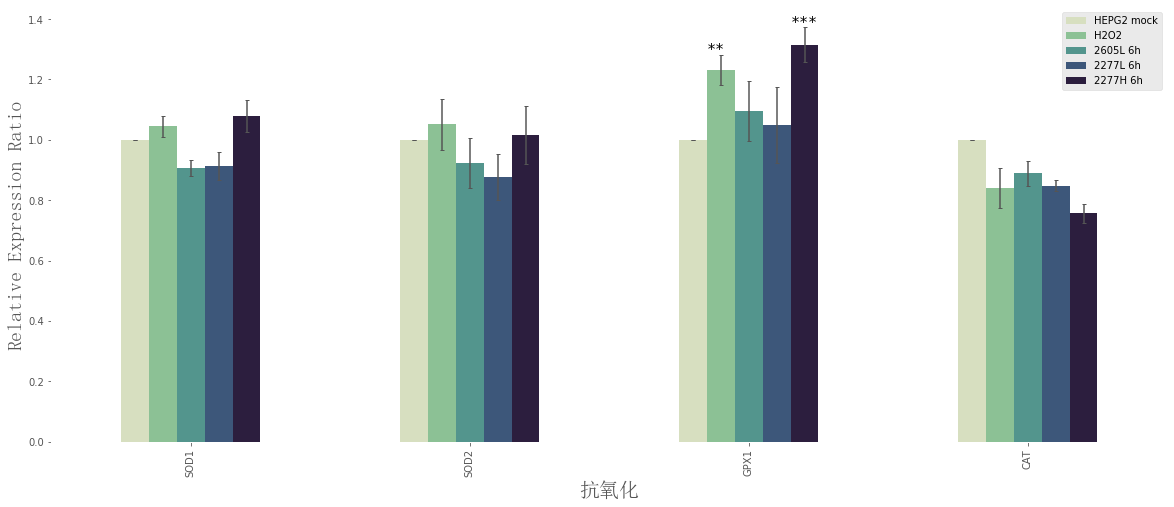

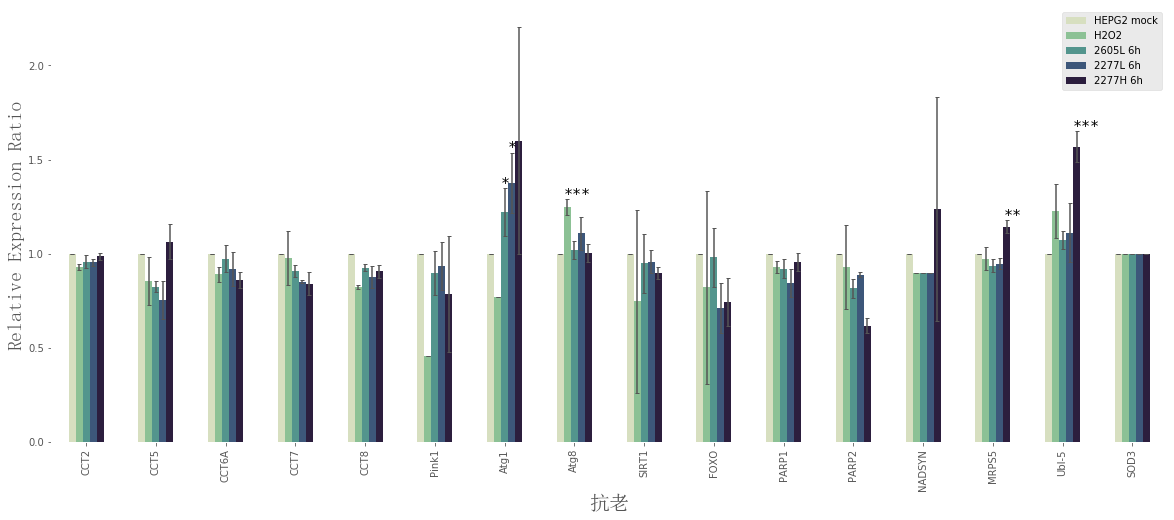

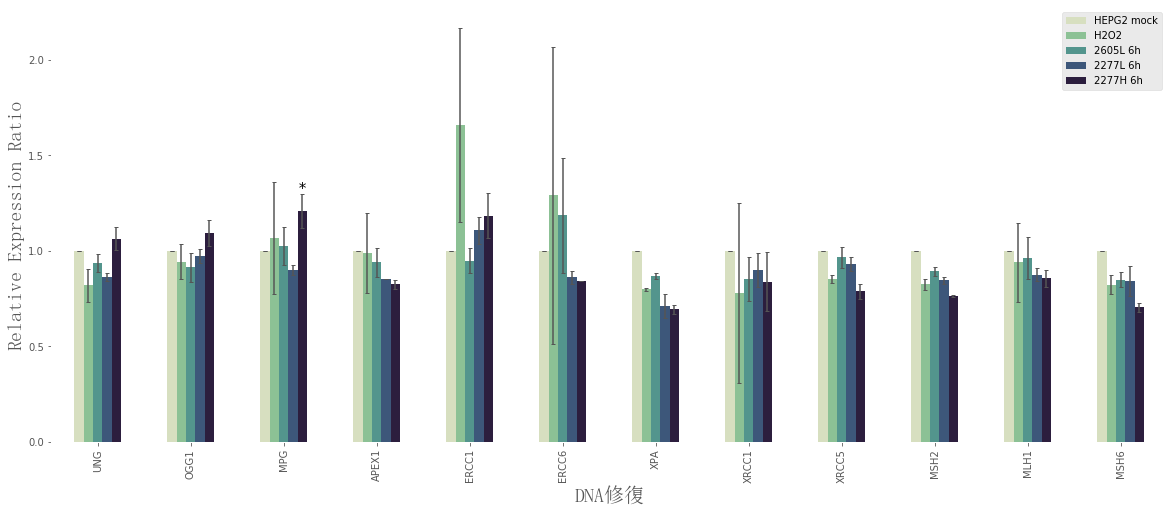

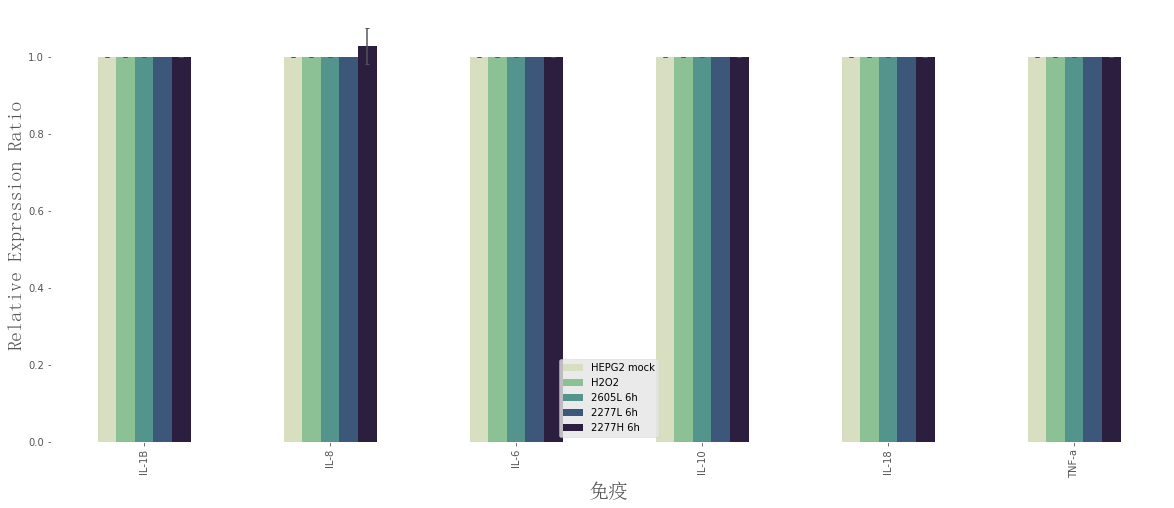

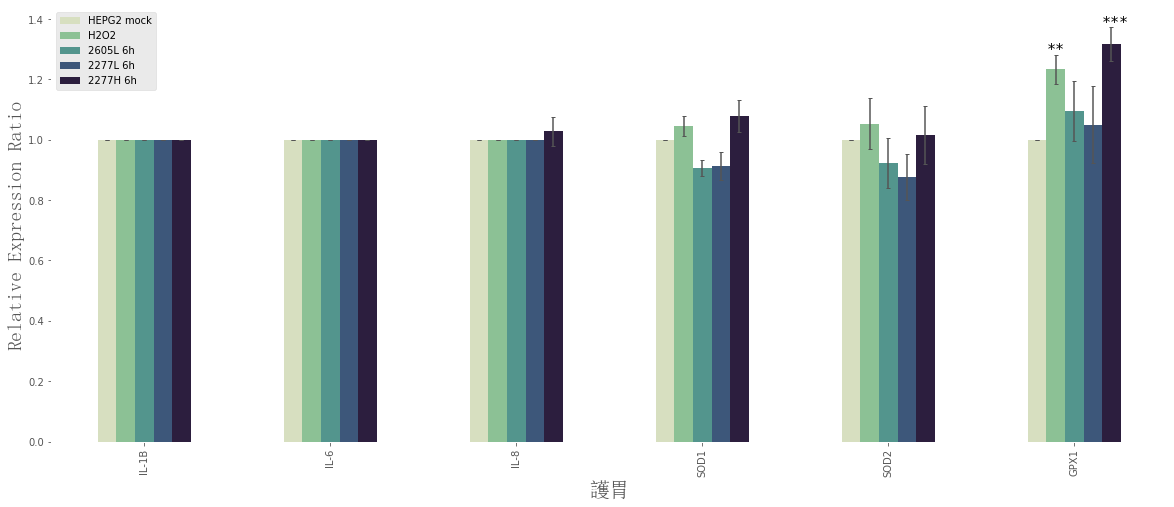

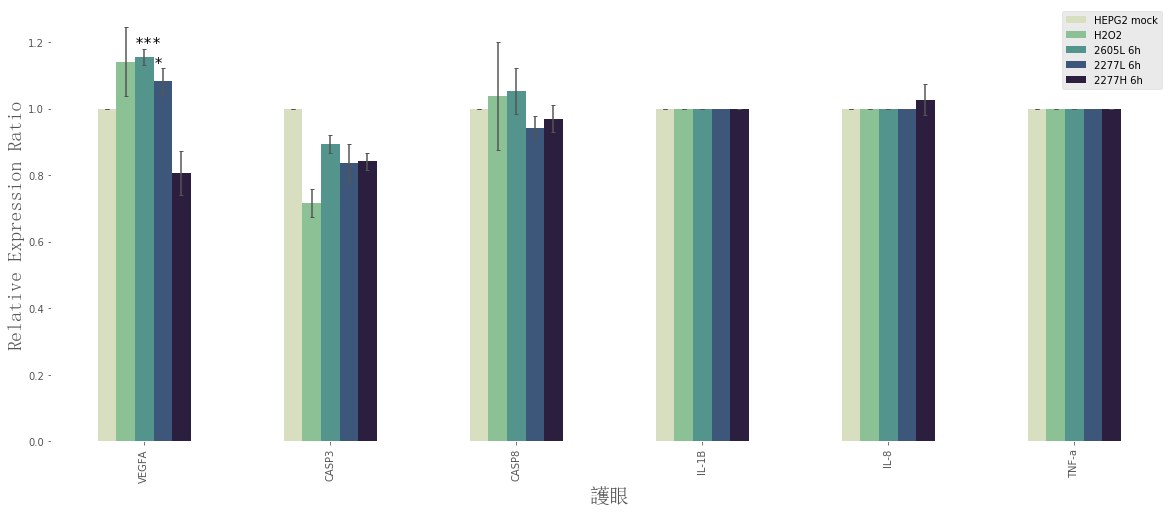

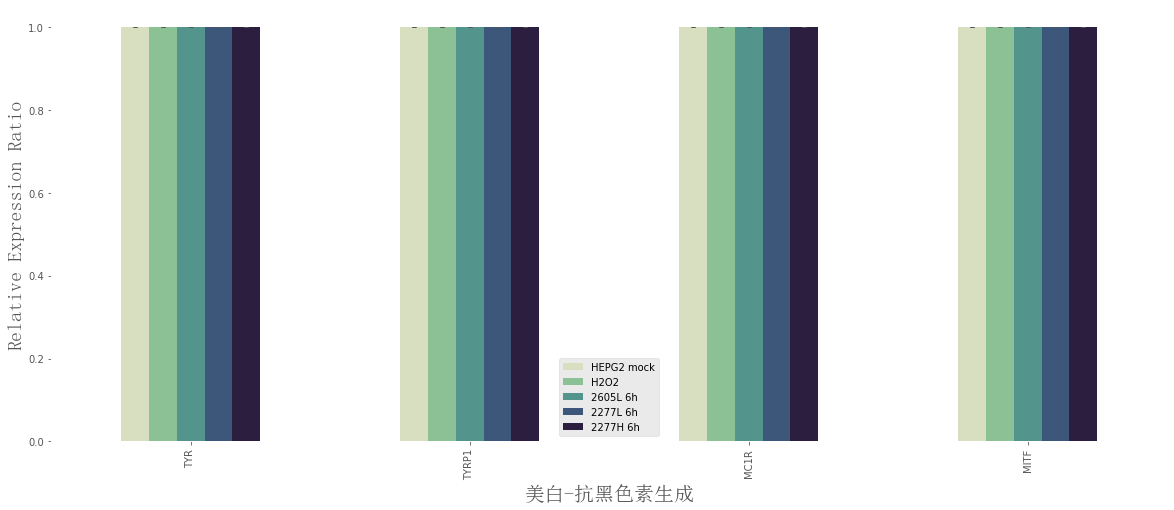

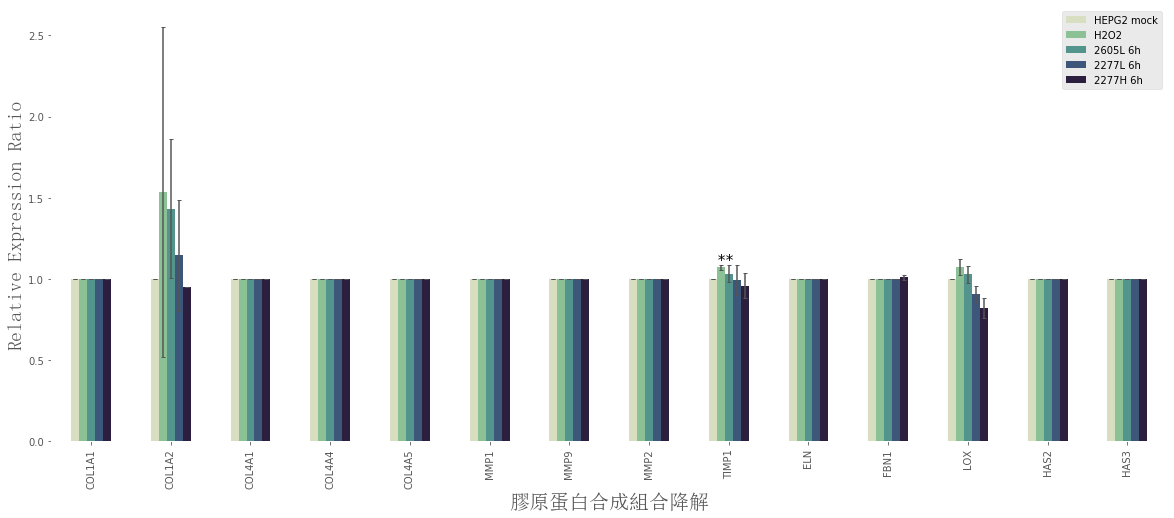

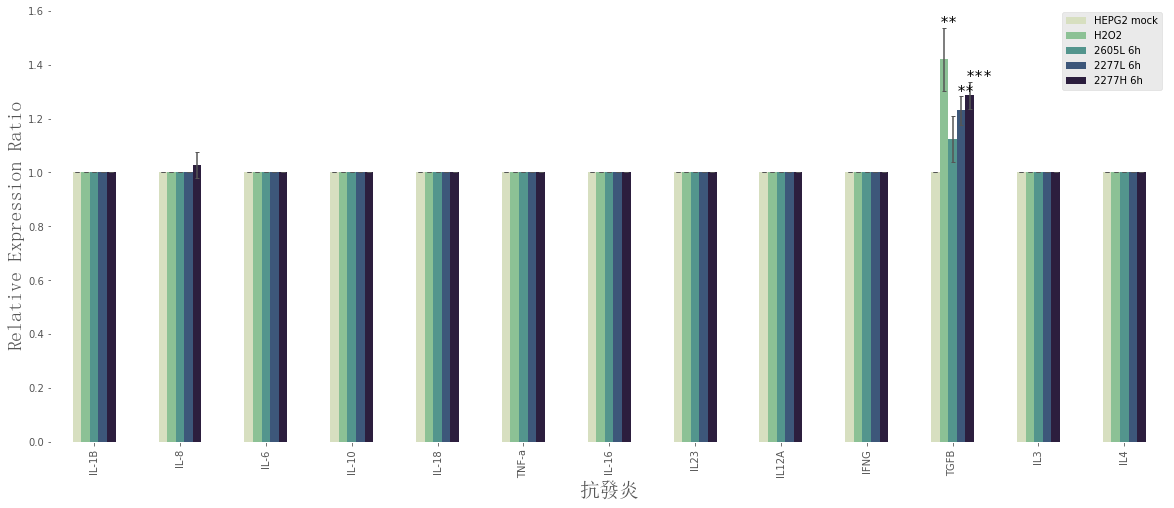

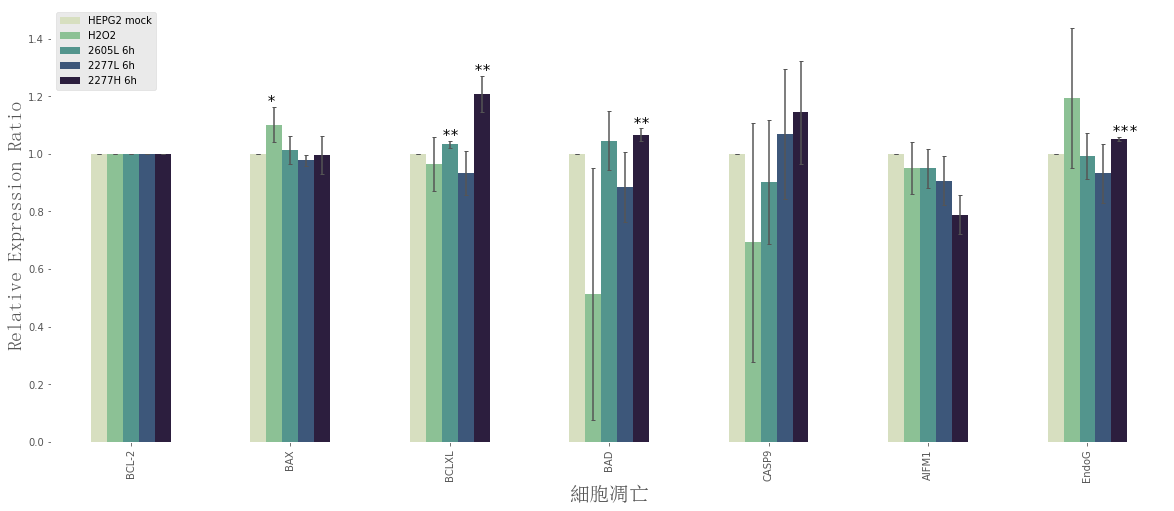

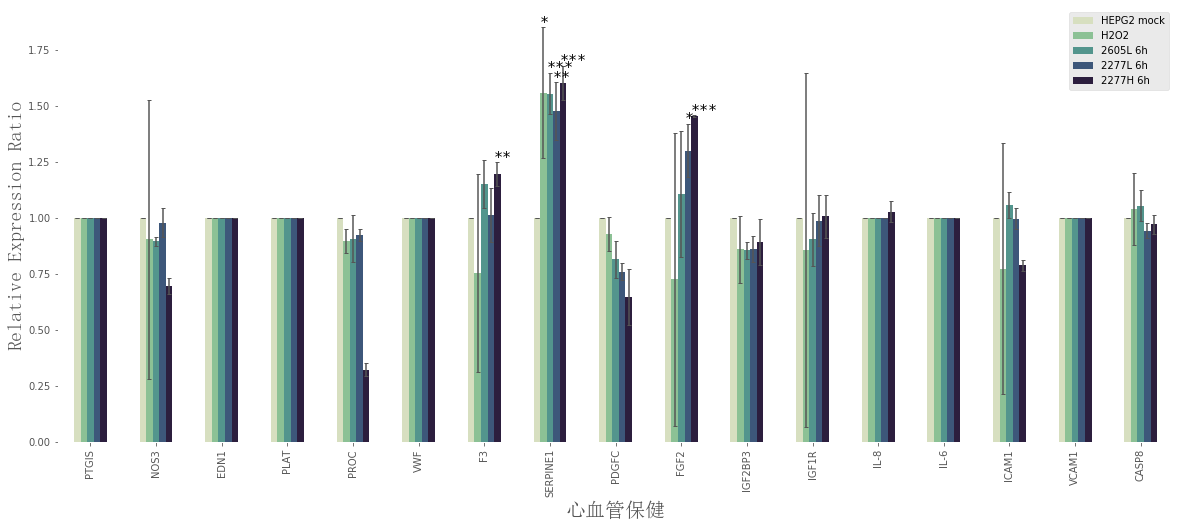

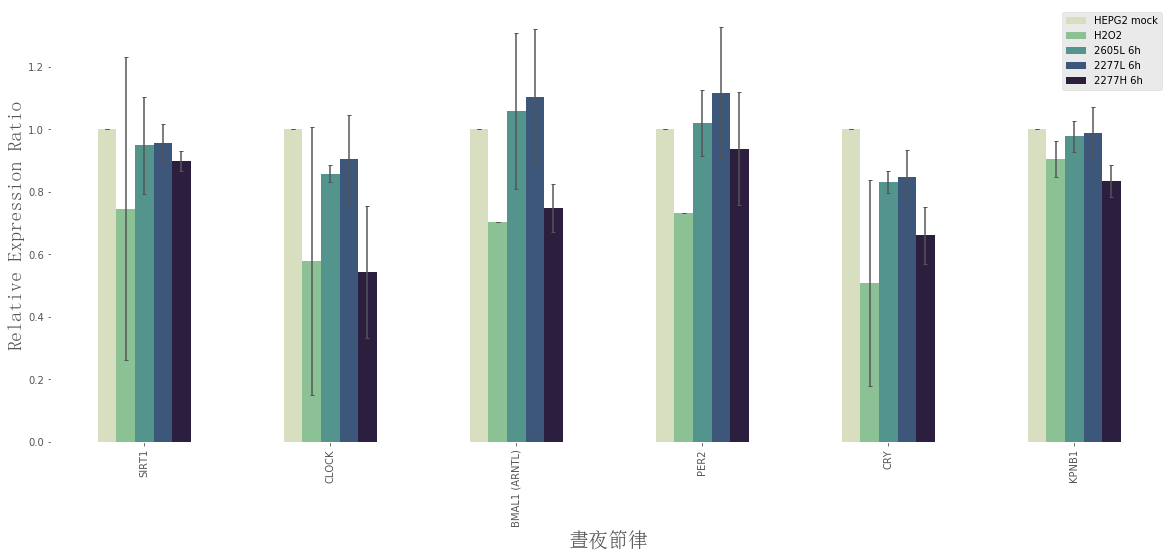

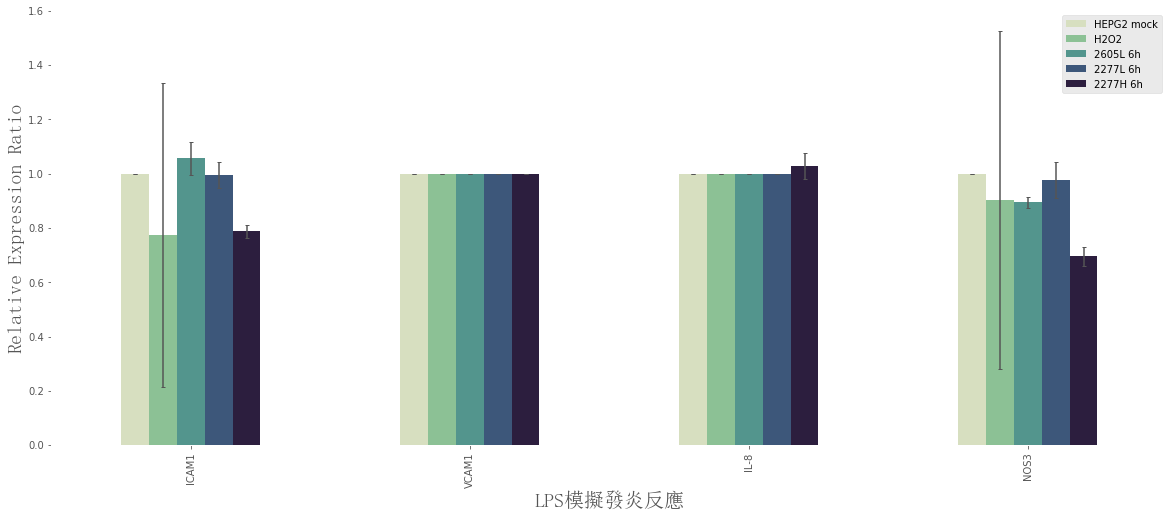

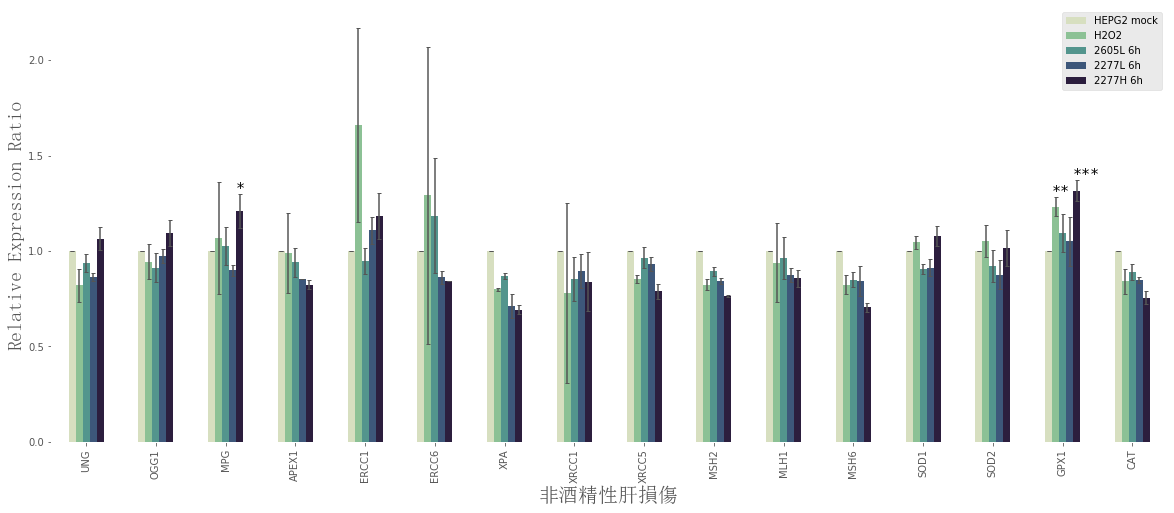

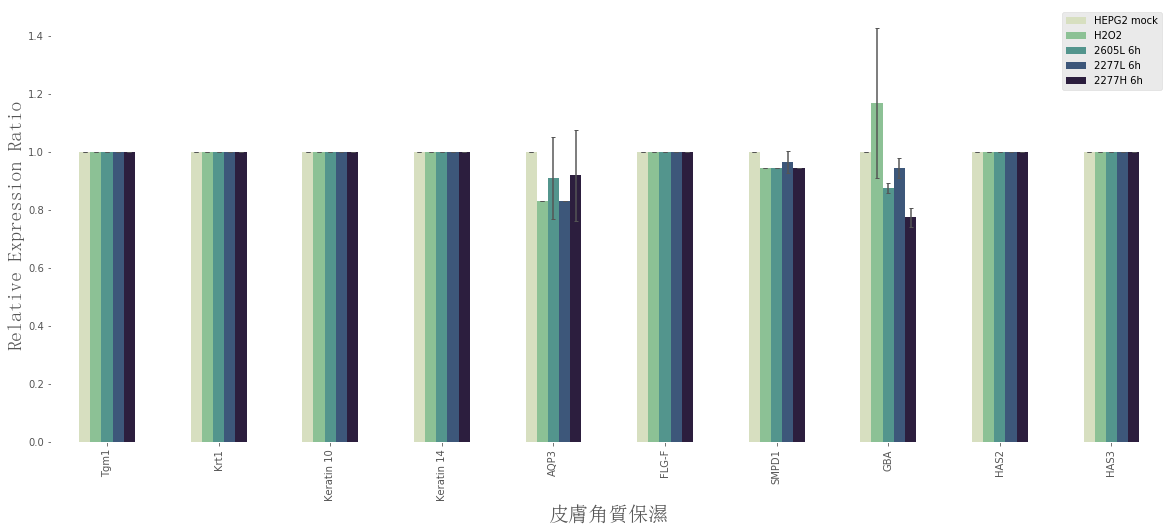

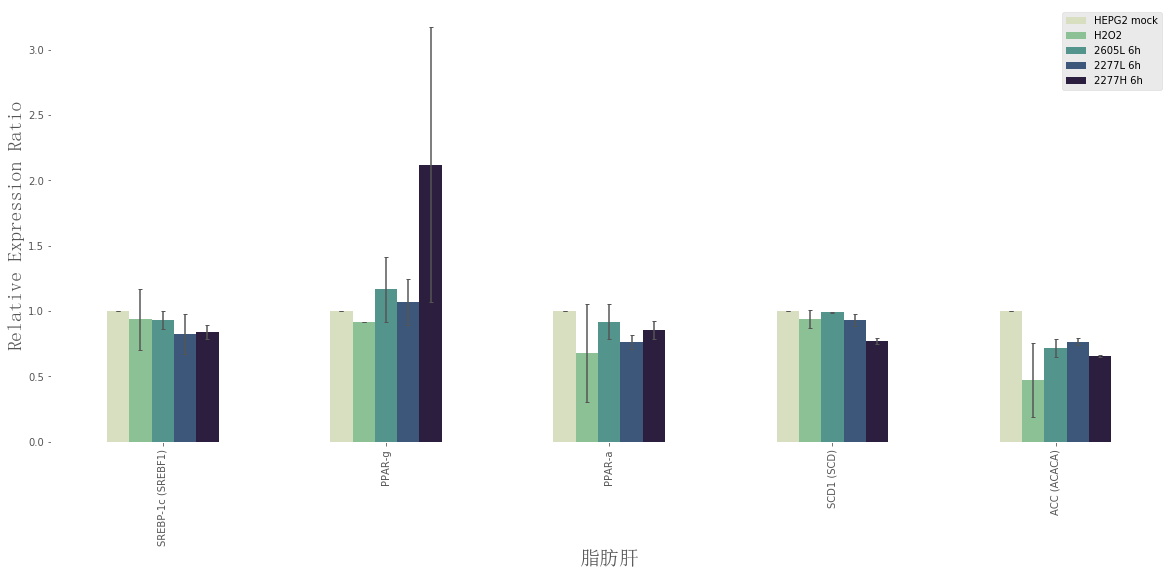

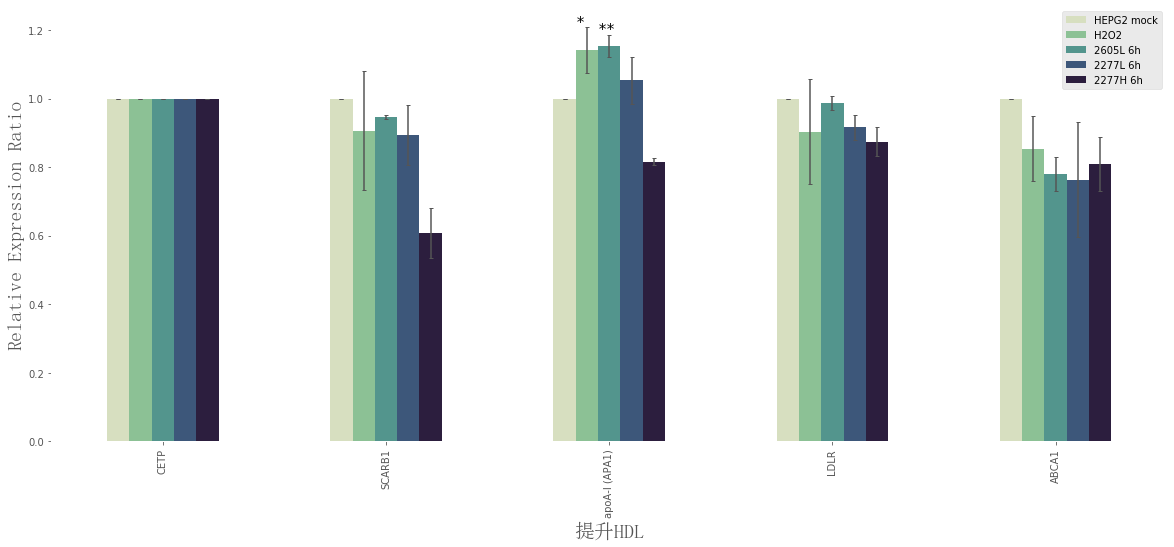

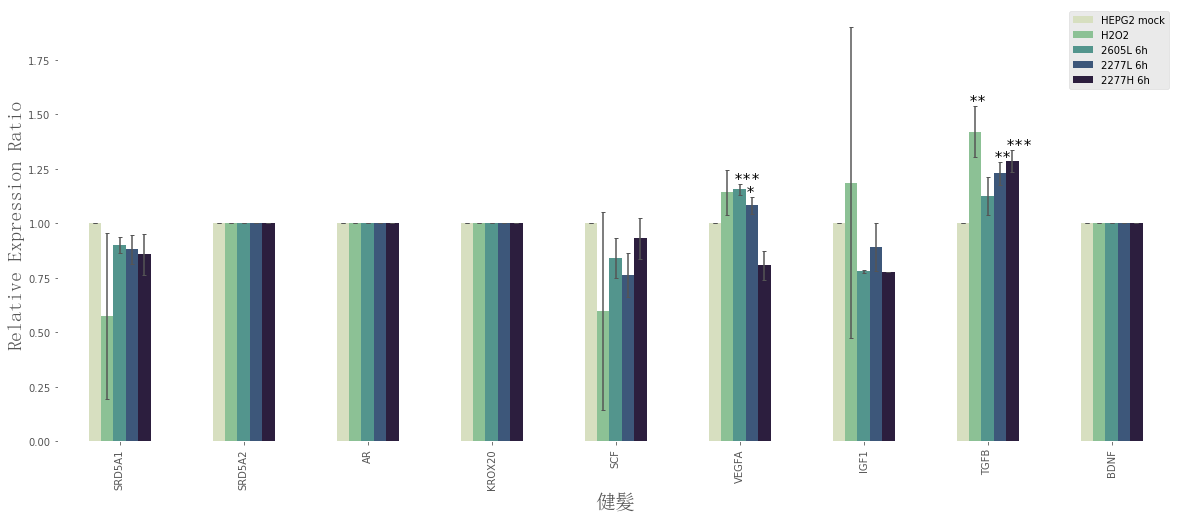

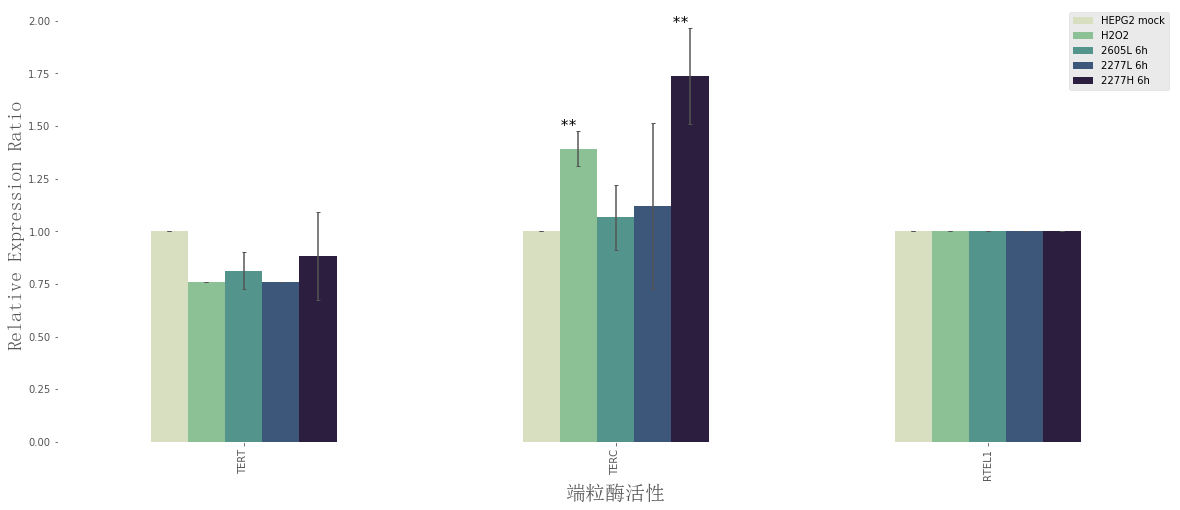

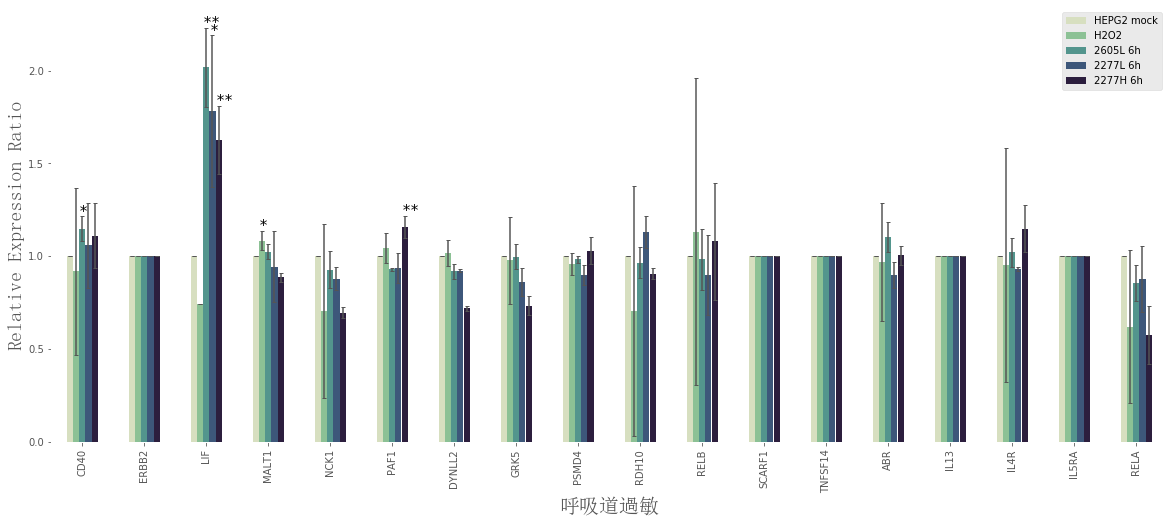

In [35]:
# barplots of each samples

whole_group=[G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G20]

from matplotlib.font_manager import FontProperties # 步驟一
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=20) # 步驟二

n=0
while n < len(whole_group):
    G_Name=whole_group[n]
    for i in range(len(G_Name)):
        if i == 0:
            plot_df=df1_mean.loc[G_Name[i]]
            std_df=df1_std.loc[G_Name[i]]
        else:
            plot_temp=df1_mean.loc[G_Name[i]]
            plot_df=pd.concat([plot_df, plot_temp], axis=1)
            
            std_temp=df1_std.loc[G_Name[i]]
            std_df=pd.concat([std_df, std_temp], axis=1)            
            
            plot_df_t=plot_df.transpose()
            std_df_t=std_df.transpose()
    
    current_palette = sns.cubehelix_palette(len(df1_mean.columns), start=.5, rot=-.75)
    
    fig, ax = plt.subplots(figsize=(20,8))
    with sns.color_palette(current_palette):
        plot_df_t.plot.bar(yerr=std_df_t, ax=ax, capsize=2)
        ax.set_facecolor('xkcd:salmon')
        ax.set_facecolor((1.0, 1, 1))
        #ax.set(xlabel=gene_fun_dic['DG'+str(n+1)], ylabel='Relative Expression Ratio')
        plt.xlabel(gene_fun_dic['DG'+str(n+1)], fontproperties=font)
        plt.ylabel("Relative Expression Ratio", fontproperties=font)
        #plt.title("標題", fontproperties=font)

        
        #建立 p-value 和 std 轉置表格
        for i in range(len(G_Name)):
            if i == 0:    
                p_df=df1_p.loc[G_Name[i]]
            else:
                p_temp=df1_p.loc[G_Name[i]]
                p_df=pd.concat([p_df, p_temp], axis=1)
        df_p_t=p_df.transpose()
        
        #建立對應n值的 p-value 和 std list
        pt_list=[]
        for i in range(len(plot_df_t[plot_df_t.columns[0]])):
            pt_list.append(1)

        for i in df_p_t.columns:
            for j in df_p_t.index:
                pt_list.append(df_p_t.at[j, i])
        #---------------------------------------------------#
        std_t_list=[]
        for i in std_df_t.columns:
            for j in std_df_t.index:
                std_t_list.append(std_df_t.at[j, i])
        m=0
        while m < len(ax.patches):
            r=ax.patches[m]
            if r.get_height() <= 500 and r.get_height() >1:
                if pt_list[m] <= 0.05 and pt_list[m] >= 0.01:
                    ax.text(r.get_x(),                 # x-position
                        r.get_height()+std_t_list[m] , # y-position 記得還要加std
                        '*', # text
                        fontsize=15, family="monospace", zorder=10)
                
                elif pt_list[m] <= 0.01 and pt_list[m] >= 0.001:
            
                    ax.text(r.get_x(), #-r.get_width(), # x
                        r.get_height()+std_t_list[m] , # y
                        '**', # text
                        fontsize=15, family="monospace", zorder=10)
                
                elif pt_list[m] <= 0.001:
                    ax.text(r.get_x(), #-r.get_width(), # x
                        r.get_height()+std_t_list[m] ,   # y
                        '***', # text
                        fontsize=15, family="monospace", zorder=10)
            m+=1
        plt.savefig(dir_data + 'nCounter_G'+str(n+1)+ filename[:-4] + '.png')
        plt.show()
    
    n+=1

## Part 11: Label the statistic result with genetic groups

In [18]:
gene_fun_dic={'G1':'抗氧化', 'G2':'抗老', 'G3':'DNA修復', 'G4':'免疫', 'G5':'護胃', 'G6':'護眼', 'G7':'美白-抗黑色素生成',
              'G8':'膠原蛋白合成組合降解', 'G9':'抗發炎', 'G10':'細胞凋亡', 'G11':'心血管保健', 'G12':'晝夜節律',
              'G13':'LPS模擬發炎反應', 'G14':'非酒精性肝損傷', 'G15':'皮膚角質保濕', 'G16':'脂肪肝', 'G17':'提升HDL', 
              'G18':'健髮', 'G19':'端粒酶活性', 'G20':'呼吸道過敏'}


In [19]:
####################
# Add the group name
####################

# concate all the gene with group order

gene = G1 + G2 + G3 + G4 + G5 + G6 + G7 + G8 + G9 + G10 + G11 + G12 + G13 + G14 + G15 + G16 + G17 + G18 + G19 + G20
gene_group = ["G1"]*len(G1) + ["G2"]*len(G2) + ["G3"]*len(G3) + ["G4"]*len(G4) + ["G5"]*len(G5) + ["G6"]*len(G6) + ["G7"]*len(G7) + ["G8"]*len(G8) + ["G9"]*len(G9) + ["G10"]*len(G10) + ["G11"]*len(G11) + ["G12"]*len(G12) + ["G13"]*len(G13) + ["G14"]*len(G14) + ["G15"]*len(G15) + ["G16"]*len(G16) + ["G17"]*len(G17) + ["G18"]*len(G18) + ["G19"]*len(G19) + ["G20"]*len(G20) 


# add the group chinese name
gene_group_CN = []
for i in range(len(gene_group)):
    
    gene_group_CN.append(gene_fun_dic[gene_group[i]])


## Part 12: Ordered mean of samples

In [20]:
#####################    
# mean in group order
#####################

mean = []
for i in range(len(gene)):
    mean.append(df1_mean.loc[gene[i]])
    
    
df_mean = pd.DataFrame(mean)
df_mean['Gene Group'] = gene_group_CN

df_mean.head()

df_mean.shape
#df_mean.to_csv("mean.csv")

(181, 6)

In [22]:
##################################
# order the mean by genetic groups
##################################

gr1 = df_mean.loc[df_mean["Gene Group"] == "DNA修復"]
gr1.sort_index(inplace=True)

gr2 = df_mean.loc[df_mean["Gene Group"] == "晝夜節律"]
gr2.sort_index(inplace=True)

gr3 = df_mean.loc[df_mean["Gene Group"] == "皮膚角質保濕"]
gr3.sort_index(inplace=True)

gr4 = df_mean.loc[df_mean["Gene Group"] == "抗氧化"]
gr4.sort_index(inplace=True)

gr5 = df_mean.loc[df_mean["Gene Group"] == "美白-抗黑色素生成"]
gr5.sort_index(inplace=True)

gr6 = df_mean.loc[df_mean["Gene Group"] == "呼吸道過敏"]
gr6.sort_index(inplace=True)

gr7 = df_mean.loc[df_mean["Gene Group"] == "護眼"]
gr7.sort_index(inplace=True)

gr8 = df_mean.loc[df_mean["Gene Group"] == "非酒精性肝損傷"]
gr8.sort_index(inplace=True)

gr9 = df_mean.loc[df_mean["Gene Group"] == "心血管保健"]
gr9.sort_index(inplace=True)

gr10 = df_mean.loc[df_mean["Gene Group"] == "免疫"]
gr10.sort_index(inplace=True)

gr11 = df_mean.loc[df_mean["Gene Group"] == "抗發炎"]
gr11.sort_index(inplace=True)

gr12 = df_mean.loc[df_mean["Gene Group"] == "細胞凋亡"]
gr12.sort_index(inplace=True)

gr13 = df_mean.loc[df_mean["Gene Group"] == "端粒酶活性"]
gr13.sort_index(inplace=True)

gr14 = df_mean.loc[df_mean["Gene Group"] == "健髮"]
gr14.sort_index(inplace=True)

gr15 = df_mean.loc[df_mean["Gene Group"] == "護胃"]
gr15.sort_index(inplace=True)

gr16 = df_mean.loc[df_mean["Gene Group"] == "抗老"]
gr16.sort_index(inplace=True)

gr17 = df_mean.loc[df_mean["Gene Group"] == "LPS模擬發炎反應"]
gr17.sort_index(inplace=True)

gr18 = df_mean.loc[df_mean["Gene Group"] == "提升HDL"]
gr18.sort_index(inplace=True)

gr19 = df_mean.loc[df_mean["Gene Group"] == "膠原蛋白合成組合降解"]
gr19.sort_index(inplace=True)

gr20 = df_mean.loc[df_mean["Gene Group"] == "脂肪肝"]
gr20.sort_index(inplace=True)


mean = pd.concat([gr1, gr2, gr3, gr4, gr5, 
                 gr6, gr7, gr8, gr9, gr10, 
                 gr11, gr12, gr13, gr14, gr15, 
                 gr16, gr17, gr18, gr19, gr20], 
                 keys=['DNA repair', 'Circadian rhythm', "Skin moisturizing", "Anti-oxidation", "Whitening",
                       "allergy", "Eye protection", "Nonalcoholic liver damage", "Cardiovascular care", "immunity", 
                       "Anti-inflammatory", "Apoptosis", "Telomerase activity", "Hair", "Stomach protection", 
                       "Antiaging", "LPS inflammatory", "Increase HDL ", "Collagen", "Fatty liver"])

# output the csv file
mean.drop("Gene Group", axis=1, inplace=True)

file_mean = dir_data + "Mean_" + filename[:-4] + ".csv"
#mean.to_csv(file_mean)

mean.head(15)


HEPG2 mock     H2O2   2605L 6h  2277L 6h  \
DNA repair       APEX1                 1.0  0.988000  0.939763  0.852248   
                 ERCC1                 1.0  1.660237  0.948699  1.108807   
                 ERCC6                 1.0  1.291011  1.185674  0.861657   
                 MLH1                  1.0  0.939482  0.961361  0.874852   
                 MPG                   1.0  1.069302  1.026257  0.899426   
                 MSH2                  1.0  0.823943  0.893273  0.844901   
                 MSH6                  1.0  0.823084  0.849817  0.841489   
                 OGG1                  1.0  0.943848  0.913226  0.973130   
                 UNG                   1.0  0.819837  0.937767  0.863830   
                 XPA                   1.0  0.799361  0.869146  0.712217   
                 XRCC1                 1.0  0.779520  0.852201  0.897406   
                 XRCC5                 1.0  0.853162  0.965619  0.931718   
Circadian rhythm BMAL1 (ARNTL)         1.0  0.704391  1.058230  1.103545   
                 CLOCK                 1.0  0.577802  0.857174  0.903553   
                 CRY                   1.0  0.507690  0.830857  0.848108   

                                2277H 6h  
DNA repair       APEX1          0.823989  
                 ERCC1          1.183689  
                 ERCC6          0.842697  
                 MLH1           0.856423  
                 MPG            1.209251  
                 MSH2           0.763807  
                 MSH6           0.704299  
                 OGG1           1.093217  
                 UNG            1.062985  
                 XPA            0.693071  
                 XRCC1          0.837972  
                 XRCC5          0.788190  
Circadian rhythm BMAL1 (ARNTL)  0.748885  
                 CLOCK          0.541999  
                 CRY            0.660517

## Part 13: Ordered std of samples

In [23]:
####################
# std in group order
####################

std = []
for i in range(len(gene)):
    std.append(df1_std.loc[gene[i]])
 
    
df_std = pd.DataFrame(std)
df_std['Gene Group'] = gene_group_CN

df_std
df_std.to_csv("std.csv")

#df_std.shape

In [24]:
#################################
# order the std by genetic groups
#################################

gr1 = df_std.loc[df_std["Gene Group"] == "DNA修復"]
gr1.sort_index(inplace=True)

gr2 = df_std.loc[df_std["Gene Group"] == "晝夜節律"]
gr2.sort_index(inplace=True)

gr3 = df_std.loc[df_std["Gene Group"] == "皮膚角質保濕"]
gr3.sort_index(inplace=True)

gr4 = df_std.loc[df_std["Gene Group"] == "抗氧化"]
gr4.sort_index(inplace=True)

gr5 = df_std.loc[df_std["Gene Group"] == "美白-抗黑色素生成"]
gr5.sort_index(inplace=True)

gr6 = df_std.loc[df_std["Gene Group"] == "呼吸道過敏"]
gr6.sort_index(inplace=True)

gr7 = df_std.loc[df_std["Gene Group"] == "護眼"]
gr7.sort_index(inplace=True)

gr8 = df_std.loc[df_std["Gene Group"] == "非酒精性肝損傷"]
gr8.sort_index(inplace=True)

gr9 = df_std.loc[df_std["Gene Group"] == "心血管保健"]
gr9.sort_index(inplace=True)

gr10 = df_std.loc[df_std["Gene Group"] == "免疫"]
gr10.sort_index(inplace=True)

gr11 = df_std.loc[df_std["Gene Group"] == "抗發炎"]
gr11.sort_index(inplace=True)

gr12 = df_std.loc[df_std["Gene Group"] == "細胞凋亡"]
gr12.sort_index(inplace=True)

gr13 = df_std.loc[df_std["Gene Group"] == "端粒酶活性"]
gr13.sort_index(inplace=True)

gr14 = df_std.loc[df_std["Gene Group"] == "健髮"]
gr14.sort_index(inplace=True)

gr15 = df_std.loc[df_std["Gene Group"] == "護胃"]
gr15.sort_index(inplace=True)

gr16 = df_std.loc[df_std["Gene Group"] == "抗老"]
gr16.sort_index(inplace=True)

gr17 = df_std.loc[df_std["Gene Group"] == "LPS模擬發炎反應"]
gr17.sort_index(inplace=True)

gr18 = df_std.loc[df_std["Gene Group"] == "提升HDL"]
gr18.sort_index(inplace=True)

gr19 = df_std.loc[df_std["Gene Group"] == "膠原蛋白合成組合降解"]
gr19.sort_index(inplace=True)

gr20 = df_std.loc[df_std["Gene Group"] == "脂肪肝"]
gr20.sort_index(inplace=True)

std = pd.concat([gr1, gr2, gr3, gr4, gr5, 
                 gr6, gr7, gr8, gr9, gr10, 
                 gr11, gr12, gr13, gr14, gr15, 
                 gr16, gr17, gr18, gr19, gr20], 
                 keys=['DNA repair', 'Circadian rhythm', "Skin moisturizing", "Anti-oxidation", "Whitening",
                       "allergy", "Eye protection", "Nonalcoholic liver damage", "Cardiovascular care", "immunity", 
                       "Anti-inflammatory", "Apoptosis", "Telomerase activity", "Hair", "Stomach protection", 
                       "Antiaging", "LPS inflammatory", "Increase HDL ", "Collagen", "Fatty liver"])



# output the csv file
std.drop("Gene Group", axis=1, inplace=True)

file_std = dir_data + "Std_" + filename[:-4] + ".csv"
#std.to_csv(file_std)

std.head(20)


HEPG2 mock     H2O2   2605L 6h  2277L 6h  \
DNA repair        APEX1                 0.0  0.209193  0.076769  0.001430   
                  ERCC1                 0.0  0.508911  0.067144  0.070935   
                  ERCC6                 0.0  0.776504  0.302425  0.032841   
                  MLH1                  0.0  0.206035  0.109606  0.034954   
                  MPG                   0.0  0.293038  0.099569  0.028358   
                  MSH2                  0.0  0.030606  0.023133  0.015883   
                  MSH6                  0.0  0.049650  0.037873  0.078728   
                  OGG1                  0.0  0.091616  0.074558  0.035531   
                  UNG                   0.0  0.085470  0.046445  0.022732   
                  XPA                   0.0  0.008819  0.015528  0.061913   
                  XRCC1                 0.0  0.473562  0.116138  0.088951   
                  XRCC5                 0.0  0.023053  0.054318  0.036825   
Circadian rhythm  BMAL1 (ARNTL)         0.0  0.000000  0.249712  0.216864   
                  CLOCK                 0.0  0.428362  0.026615  0.141629   
                  CRY                   0.0  0.328552  0.036018  0.083791   
                  KPNB1                 0.0  0.057965  0.049650  0.083162   
                  PER2                  0.0  0.000000  0.105315  0.208680   
                  SIRT1                 0.0  0.484569  0.156330  0.060645   
Skin moisturizing AQP3                  0.0  0.000000  0.141748  0.000000   
                  FLG-F                 0.0  0.000000  0.000000  0.000000   

                                 2277H 6h  
DNA repair        APEX1          0.023644  
                  ERCC1          0.118600  
                  ERCC6          0.000000  
                  MLH1           0.043268  
                  MPG            0.088037  
                  MSH2           0.007259  
                  MSH6           0.024035  
                  OGG1           0.068288  
                  UNG            0.060157  
                  XPA            0.023682  
                  XRCC1          0.154496  
                  XRCC5          0.040926  
Circadian rhythm  BMAL1 (ARNTL)  0.077066  
                  CLOCK          0.211429  
                  CRY            0.091016  
                  KPNB1          0.050756  
                  PER2           0.180153  
                  SIRT1          0.032104  
Skin moisturizing AQP3           0.156807  
                  FLG-F          0.000000

## Part 14: Ordered p-value of samples

In [25]:
########################
# p-value in group order
########################

p = []
for i in range(len(gene)):
    p.append(df1_p.loc[gene[i]])
    
    
df_p = pd.DataFrame(p)
df_p['Gene Group'] = gene_group_CN
#df_p.to_csv("p-value.csv")

In [26]:
#####################################
# order the p-value by genetic groups
#####################################

gr1 = df_p.loc[df_p["Gene Group"] == "DNA修復"]
gr1.sort_index(inplace=True)

gr2 = df_p.loc[df_p["Gene Group"] == "晝夜節律"]
gr2.sort_index(inplace=True)

gr3 = df_p.loc[df_p["Gene Group"] == "皮膚角質保濕"]
gr3.sort_index(inplace=True)

gr4 = df_p.loc[df_p["Gene Group"] == "抗氧化"]
gr4.sort_index(inplace=True)

gr5 = df_p.loc[df_p["Gene Group"] == "美白-抗黑色素生成"]
gr5.sort_index(inplace=True)

gr6 = df_p.loc[df_p["Gene Group"] == "呼吸道過敏"]
gr6.sort_index(inplace=True)

gr7 = df_p.loc[df_p["Gene Group"] == "護眼"]
gr7.sort_index(inplace=True)

gr8 = df_p.loc[df_p["Gene Group"] == "非酒精性肝損傷"]
gr8.sort_index(inplace=True)

gr9 = df_p.loc[df_p["Gene Group"] == "心血管保健"]
gr9.sort_index(inplace=True)

gr10 = df_p.loc[df_p["Gene Group"] == "免疫"]
gr10.sort_index(inplace=True)

gr11 = df_p.loc[df_p["Gene Group"] == "抗發炎"]
gr11.sort_index(inplace=True)

gr12 = df_p.loc[df_p["Gene Group"] == "細胞凋亡"]
gr12.sort_index(inplace=True)

gr13 = df_p.loc[df_p["Gene Group"] == "端粒酶活性"]
gr13.sort_index(inplace=True)

gr14 = df_p.loc[df_p["Gene Group"] == "健髮"]
gr14.sort_index(inplace=True)

gr15 = df_p.loc[df_p["Gene Group"] == "護胃"]
gr15.sort_index(inplace=True)

gr16 = df_p.loc[df_p["Gene Group"] == "抗老"]
gr16.sort_index(inplace=True)

gr17 = df_p.loc[df_p["Gene Group"] == "LPS模擬發炎反應"]
gr17.sort_index(inplace=True)

gr18 = df_p.loc[df_p["Gene Group"] == "提升HDL"]
gr18.sort_index(inplace=True)

gr19 = df_p.loc[df_p["Gene Group"] == "膠原蛋白合成組合降解"]
gr19.sort_index(inplace=True)

gr20 = df_p.loc[df_p["Gene Group"] == "脂肪肝"]
gr20.sort_index(inplace=True)


#p_value = pd.concat([gr1, gr2, gr3, gr4, gr5, 
#                     gr6, gr7, gr8, gr9, gr10, 
#                     gr11, gr12, gr13, gr14, gr15, 
#                     gr16, gr17, gr18, gr19, gr20], 
#                     keys=['DNA修復', '晝夜節律', "皮膚角質保濕", "抗氧化", "美白-抗黑色素生成",
#                           "呼吸道過敏", "護眼", "非酒精性肝損傷", "心血管保健", "免疫", 
#                           "抗發炎", "細胞凋亡", "端粒酶活性", "健髮", "護胃", 
#                           "抗老", "LPS模擬發炎反應", "提升HDL", "膠原蛋白合成組合降解", "脂肪肝"])

p_value = pd.concat([gr1, gr2, gr3, gr4, gr5, 
                     gr6, gr7, gr8, gr9, gr10, 
                     gr11, gr12, gr13, gr14, gr15, 
                     gr16, gr17, gr18, gr19, gr20], 
                     keys=['DNA repair', 'Circadian rhythm', "Skin moisturizing", "Anti-oxidation", "Whitening",
                           "allergy", "Eye protection", "Nonalcoholic liver damage", "Cardiovascular care", "immunity", 
                           "Anti-inflammatory", "Apoptosis", "Telomerase activity", "Hair", "Stomach protection", 
                           "Antiaging", "LPS inflammatory", "Increase HDL ", "Collagen", "Fatty liver"])


# output the csv file
p_value.drop("Gene Group", axis=1, inplace=True)

file_p = dir_data + "p-value_" + filename[:-4] + ".csv"
#p_value.to_csv(file_p)

# with chinese the row number will not be same as the length of the gene name
#p_value.to_csv("p_test.csv", encoding='utf-8') 

p_value.head(20)



H2O2   2605L 6h      2277L 6h  \
DNA repair        APEX1          0.925638  0.245706  5.849856e-09   
                  ERCC1          0.087929  0.256293  5.657955e-02   
                  ERCC6          0.551647  0.347539  1.875954e-03   
                  MLH1           0.637703  0.574458  3.438900e-03   
                  MPG            0.703069  0.671556  3.561307e-03   
                  MSH2           0.000570  0.001330  7.164335e-05   
                  MSH6           0.003500  0.002354  2.518446e-02   
                  OGG1           0.348271  0.114037  2.604165e-01   
                  UNG            0.021752  0.081064  4.871586e-04   
                  XPA            0.000002  0.000128  1.292301e-03   
                  XRCC1          0.465223  0.092217  1.164194e-01   
                  XRCC5          0.000384  0.334509  3.253894e-02   
Circadian rhythm  BMAL1 (ARNTL)  0.000000  0.706953  4.547180e-01   
                  CLOCK          0.162988  0.000745  3.035615e-01   
                  CRY            0.060343  0.001243  3.485572e-02   
                  KPNB1          0.045641  0.480263  8.187118e-01   
                  PER2           0.000000  0.754723  3.848529e-01   
                  SIRT1          0.413738  0.597715  2.785741e-01   
Skin moisturizing AQP3           0.000000  0.332627  0.000000e+00   
                  FLG-F               NaN       NaN           NaN   

                                     2277H 6h  
DNA repair        APEX1          2.086523e-04  
                  ERCC1          5.507786e-02  
                  ERCC6          0.000000e+00  
                  MLH1           4.542750e-03  
                  MPG            1.465015e-02  
                  MSH2           5.936853e-07  
                  MSH6           2.867692e-05  
                  OGG1           7.729770e-02  
                  UNG            1.439621e-01  
                  XPA            2.331830e-05  
                  XRCC1          1.434603e-01  
                  XRCC5          8.568986e-04  
Circadian rhythm  BMAL1 (ARNTL)  4.853178e-03  
                  CLOCK          1.991274e-02  
                  CRY            2.956284e-03  
                  KPNB1          4.695636e-03  
                  PER2           5.838460e-01  
                  SIRT1          5.331821e-03  
Skin moisturizing AQP3           4.192940e-01  
                  FLG-F                   NaN

## Part15: Concat the ordered mean, std, p-value

In [31]:
########################################
# combine columns of mean , std, p-value
########################################
df = pd.DataFrame()

df['STD'] = ""
df['p-value'] = ""

df = pd.concat([mean, df['STD'], std, df['p-value'], p_value] , axis = 1)

file_combine = dir_data + "combine.csv"

df.to_csv(file_combine)

df.head(15)

HEPG2 mock     H2O2   2605L 6h  2277L 6h  \
DNA repair       APEX1                 1.0  0.988000  0.939763  0.852248   
                 ERCC1                 1.0  1.660237  0.948699  1.108807   
                 ERCC6                 1.0  1.291011  1.185674  0.861657   
                 MLH1                  1.0  0.939482  0.961361  0.874852   
                 MPG                   1.0  1.069302  1.026257  0.899426   
                 MSH2                  1.0  0.823943  0.893273  0.844901   
                 MSH6                  1.0  0.823084  0.849817  0.841489   
                 OGG1                  1.0  0.943848  0.913226  0.973130   
                 UNG                   1.0  0.819837  0.937767  0.863830   
                 XPA                   1.0  0.799361  0.869146  0.712217   
                 XRCC1                 1.0  0.779520  0.852201  0.897406   
                 XRCC5                 1.0  0.853162  0.965619  0.931718   
Circadian rhythm BMAL1 (ARNTL)         1.0  0.704391  1.058230  1.103545   
                 CLOCK                 1.0  0.577802  0.857174  0.903553   
                 CRY                   1.0  0.507690  0.830857  0.848108   

                                2277H 6h  STD  HEPG2 mock     H2O2   2605L 6h  \
DNA repair       APEX1          0.823989  NaN         0.0  0.209193  0.076769   
                 ERCC1          1.183689  NaN         0.0  0.508911  0.067144   
                 ERCC6          0.842697  NaN         0.0  0.776504  0.302425   
                 MLH1           0.856423  NaN         0.0  0.206035  0.109606   
                 MPG            1.209251  NaN         0.0  0.293038  0.099569   
                 MSH2           0.763807  NaN         0.0  0.030606  0.023133   
                 MSH6           0.704299  NaN         0.0  0.049650  0.037873   
                 OGG1           1.093217  NaN         0.0  0.091616  0.074558   
                 UNG            1.062985  NaN         0.0  0.085470  0.046445   
                 XPA            0.693071  NaN         0.0  0.008819  0.015528   
                 XRCC1          0.837972  NaN         0.0  0.473562  0.116138   
                 XRCC5          0.788190  NaN         0.0  0.023053  0.054318   
Circadian rhythm BMAL1 (ARNTL)  0.748885  NaN         0.0  0.000000  0.249712   
                 CLOCK          0.541999  NaN         0.0  0.428362  0.026615   
                 CRY            0.660517  NaN         0.0  0.328552  0.036018   

                                2277L 6h  2277H 6h p-value     H2O2   \
DNA repair       APEX1          0.001430  0.023644     NaN  0.925638   
                 ERCC1          0.070935  0.118600     NaN  0.087929   
                 ERCC6          0.032841  0.000000     NaN  0.551647   
                 MLH1           0.034954  0.043268     NaN  0.637703   
                 MPG            0.028358  0.088037     NaN  0.703069   
                 MSH2           0.015883  0.007259     NaN  0.000570   
                 MSH6           0.078728  0.024035     NaN  0.003500   
                 OGG1           0.035531  0.068288     NaN  0.348271   
                 UNG            0.022732  0.060157     NaN  0.021752   
                 XPA            0.061913  0.023682     NaN  0.000002   
                 XRCC1          0.088951  0.154496     NaN  0.465223   
                 XRCC5          0.036825  0.040926     NaN  0.000384   
Circadian rhythm BMAL1 (ARNTL)  0.216864  0.077066     NaN  0.000000   
                 CLOCK          0.141629  0.211429     NaN  0.162988   
                 CRY            0.083791  0.091016     NaN  0.060343   

                                2605L 6h      2277L 6h      2277H 6h  
DNA repair       APEX1          0.245706  5.849856e-09  2.086523e-04  
                 ERCC1          0.256293  5.657955e-02  5.507786e-02  
                 ERCC6          0.347539  1.875954e-03  0.000000e+00  
                 MLH1           0.574458  3.438900e-03  4.542750e-03  
          

## Part 16: Colored the gene with up and down regulate

In [32]:
#######################################
# label the gene color with red & green
#######################################
df = pd.read_csv(file_combine)

df = df.rename({'Unnamed: 0': 'Category', 'Unnamed: 1': 'AVG'}, axis=1)

df.reset_index(drop = True, inplace=True)


def style_specific_cell(x):

    red = 'background-color: red'
    green = 'background-color: green'
    grey = 'background-color: grey' 
    
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    
    # DNA repair
    df1.iloc[0:12,1] = green
    
    # Circadian rhythm
    df1.iloc[12:18,1] = green
    
    # Skin moisturizing
    df1.iloc[18:28,1] = green
    
    # Anti-oxidation
    df1.iloc[28:32,1] = green
    
    # Whitening
    df1.iloc[32:36,1] = red
    
    # allergy
    df1.iloc[36:54,1] = red
    
    # Eye protection
    df1.iloc[54:60,1] = red
    
    # Nonalcoholic liver damage
    df1.iloc[60:76,1] = red
    
    # Cardiovascular care
    df1.iloc[76:93,1] = red
    df1.iloc[[89, 85, 87, 88],1] = green
    
    # immunity
    df1.iloc[93:99,1] = green
    
    # Anti-inflammatory
    df1.iloc[99:112,1] = red
    df1.iloc[[100, 110, 109],1] = green
    
    # Apoptosis
    df1.iloc[112:119,1] = grey
    
    # Telomerase activity
    df1.iloc[119:122,1] = green
    
    # Hair
    df1.iloc[122:131,1] = red
    df1.iloc[[125, 126, 130, 124],1] = green
    
    # Stomach protection
    df1.iloc[131:137,1] = red
    df1.iloc[[135, 136, 131],1] = green
    
    # Antiaging
    df1.iloc[137:153,1] = green
    df1.iloc[[147, 148],1] = red
    
    # LPS inflammatory
    df1.iloc[153:157,1] = red
    df1.iloc[155,1] = green
    
    # Increase HDL
    df1.iloc[157:162,1] = green
    
    # Collagen
    df1.iloc[162:176,1] = green
    df1.iloc[172:175,1] = red
    
    # Fatty Liver
    df1.iloc[176:181,1] = red
    df1.iloc[177,1] = green
    
    return df1

df_color = df.style.apply(style_specific_cell, axis=None)

file_combine = dir_data + "Mean&Std&p-value_" + filename[:-4] + ".xlsx"

df_color.to_excel(file_combine)

df_color

,Category,AVG,HEPG2 mock,H2O2,2605L 6h,2277L 6h,2277H 6h,STD,HEPG2 mock.1,H2O2 .1,2605L 6h.1,2277L 6h.1,2277H 6h.1,p-value,H2O2 .2,2605L 6h.2,2277L 6h.2,2277H 6h.2
0,DNA repair,APEX1,1,0.988,0.939763,0.852248,0.823989,nan,0,0.209193,0.0767687,0.0014301,0.0236441,nan,0.925638,0.245706,5.84986e-09,0.000208652
1,DNA repair,ERCC1,1,1.66024,0.948699,1.10881,1.18369,nan,0,0.508911,0.0671445,0.070935,0.1186,nan,0.0879293,0.256293,0.0565796,0.0550779
2,DNA repair,ERCC6,1,1.29101,1.18567,0.861657,0.842697,nan,0,0.776504,0.302425,0.0328409,0,nan,0.551647,0.347539,0.00187595,0
3,DNA repair,MLH1,1,0.939482,0.961361,0.874852,0.856423,nan,0,0.206035,0.109606,0.0349537,0.0432684,nan,0.637703,0.574458,0.0034389,0.00454275
4,DNA repair,MPG,1,1.0693,1.02626,0.899426,1.20925,nan,0,0.293038,0.0995692,0.0283583,0.0880368,nan,0.703069,0.671556,0.00356131,0.0146502
5,DNA repair,MSH2,1,0.823943,0.893273,0.844901,0.763807,nan,0,0.0306061,0.023133,0.0158833,0.00725949,nan,0.000570048,0.00132956,7.16433e-05,5.93685e-07
6,DNA repair,MSH6,1,0.823084,0.849817,0.841489,0.704299,nan,0,0.0496495,0.0378735,0.0787284,0.0240351,nan,0.00350005,0.00235369,0.0251845,2.86769e-05
7,DNA repair,OGG1,1,0.943848,0.913226,0.97313,1.09322,nan,0,0.0916161,0.074558,0.0355312,0.0682884,nan,0.348271,0.114037,0.260417,0.0772977
8,DNA repair,UNG,1,0.819837,0.937767,0.86383,1.06299,nan,0,0.0854695,0.0464449,0.0227316,0.0601565,nan,0.0217518,0.0810641,0.000487159,0.143962
9,DNA repair,XPA,1,0.799361,0.869146,0.712217,0.693071,nan,0,0.00881922,0.015528,0.0619126,0.0236819,nan,2.47802e-06,0.00012816,0.0012923,2.33183e-05


## Part 17: Get the mean, std, p-value of specific genetic group (Optional)

In [54]:
#單組基因群 才按這格
# Get the mean of G2
DNA_repair_mean = []
for i in range(len(G2)):
    DNA_repair_mean.append(df1_mean.loc[G2[i]])
    
    
df_mean = pd.DataFrame(DNA_repair_mean)
df_mean.to_csv("antiaging_mean.csv")

In [55]:
#單組基因群 才按這格
# Get the std of G14
DNA_repair_std = []
for i in range(len(G2)):
    DNA_repair_std.append(df1_std.loc[G2[i]])
    
    
df_std = pd.DataFrame(DNA_repair_std)
df_std.to_csv("antiaging_std.csv")

In [56]:
#單組基因群 才按這格
# Get the p-value of G14
DNA_repair_p = []
for i in range(len(G2)):
    DNA_repair_p.append(df1_p.loc[G2[i]])
    
    
df_p = pd.DataFrame(DNA_repair_p)
df_p.to_csv("antiaging_p.csv")

In [57]:
#target_group=[G2]

#from matplotlib.font_manager import FontProperties # 步驟一
#font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=20) # 步驟二

#n=0
#while n < len(target_group):
#    G_Name=target_group[n]
#    for i in range(len(G_Name)):
#        if i == 0:
#            plot_df=df1_mean.loc[G_Name[i]]
#            std_df=df1_std.loc[G_Name[i]]
#            p_df=df1_p.loc[G_Name[i]]
            
#            p_c_df=df_c_p.loc[G_Name[i]]
#            
#        else:
#            plot_temp=df1_mean.loc[G_Name[i]]
#            plot_df=pd.concat([plot_df, plot_temp], axis=1)
#            
#            std_temp=df1_std.loc[G_Name[i]]
#            std_df=pd.concat([std_df, std_temp], axis=1)            

#            p_temp=df1_p.loc[G_Name[i]]
#            p_df=pd.concat([p_df, p_temp], axis=1) 
#            
#            p_c_temp=df_c_p.loc[G_Name[i]]
#            p_c_df=pd.concat([p_c_df, p_c_temp], axis=1) 
#            
#            plot_df_t=plot_df.transpose()
#            std_df_t=std_df.transpose()
#            p_df_t=p_df.transpose()
#            p_c_df_t=p_c_df.transpose()
#    n+=1
    
#plot_df_t.to_csv('nCounter_G2_mean.csv')
#std_df_t.to_csv('nCounter_G2_std.csv')
#p_df_t.to_csv('nCounter_G2_p.csv')
#p_c_df_t.to_csv('nCounter_G2_c_p.csv')

In [58]:
#group1_list=['2346-L 24h', '2346-H 24h', '2346-L 48h', '2346-H 48h']
#group2_list=['2347-L 24h', '2347-H 24h', '2347-L 48hr', '2347-H 48hr']

#for j in range(len(group1_list)):
    
#    p_list=[]
    
#    for i in table_index:
        
#        g1_list=[]
#        g1_list.append(float(ndf1_test[group1_list[j]+'1'][i]))
#        g1_list.append(float(ndf1_test[group1_list[j]+'2'][i]))
#        g1_list.append(float(ndf1_test[group1_list[j]+'3'][i]))
       
#        g2_list=[]
#        g2_list.append(float(ndf1_test[group2_list[j]+'1'][i]))
#        g2_list.append(float(ndf1_test[group2_list[j]+'2'][i]))
#        g2_list.append(float(ndf1_test[group2_list[j]+'3'][i]))
        
#        p_value=ttest_ind(g1_list, g2_list)[1]
#        p_list.append(p_value)
#        #print(g1_list, g2_list)
    
#    if j == 0:
#        df_c_p=pd.DataFrame(p_list)
#    else:
#        df_c_p_0=pd.DataFrame(p_list)
#        df_c_p=pd.concat([df_c_p, df_c_p_0], axis=1)

#df_index=pd.DataFrame({'index':table_index})
#df_c_p=df_c_p.rename(index=df_index['index'])
#table_col=[]
#for i in range(len(group1_list)):
#    table_col.append(group1_list[i]+' vs '+group2_list[i])

#df_c_p.columns=table_col

#df_c_p.to_csv('nCounter_c_test.csv')
#df_c_p